In [1]:
import sys
sys.path.append('../')
import src.utils as utils
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
reload(utils)

<module 'src.utils' from '/Users/leandro_1/Documents/GitHub/kcl-continuous-time-finance/notebooks/../src/utils.py'>

In [2]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
%config InlineBackend.figure_format = "retina"

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
np.random.seed(2)

## Random Walk
$$
\left(R_t\right)_{t\in[0,10]}
$$
be a Random Walk with $p = 0.4$.

In [5]:
RW = utils.RandomWalk(p = 0.4, T = 10.5, Nt = 1_000)

In [6]:
sims = RW.simulate(nsims = 3)
time = RW.timesteps

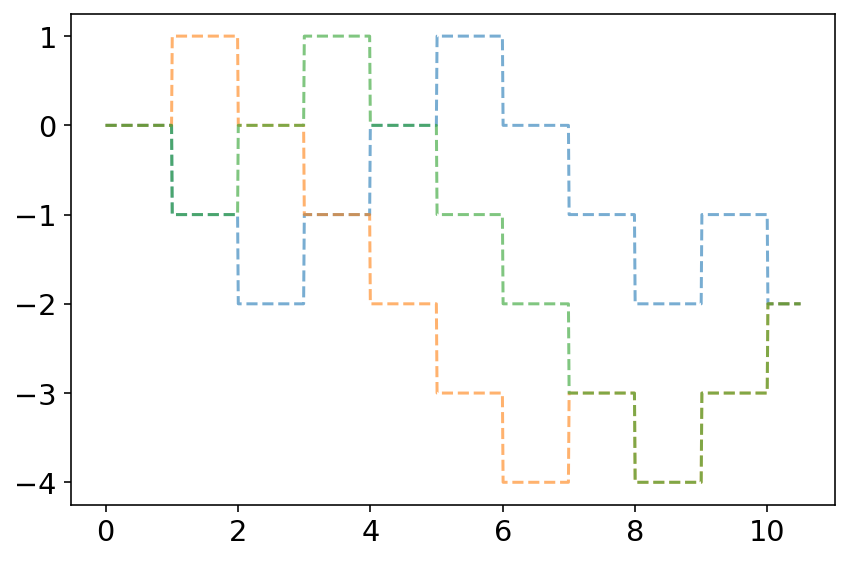

In [7]:
plt.figure()
plt.plot(time, sims, linestyle = '--', alpha = 0.6)
resolution_value = 50
#plt.title('Five simulations of a Geometric Brownian motion')
plt.tight_layout()
plt.savefig('../figures/sample_path_Random_Walk.pdf', format="pdf", dpi=resolution_value)
plt.show()

## Brownian motion
$$
\left(W_t\right)_{t\in[0,1]}
$$


In [8]:
BM = utils.BrownianMotion(T = 1, Nt = 1_000)

In [9]:
sims = BM.simulate(nsims = 3)
time = BM.timesteps

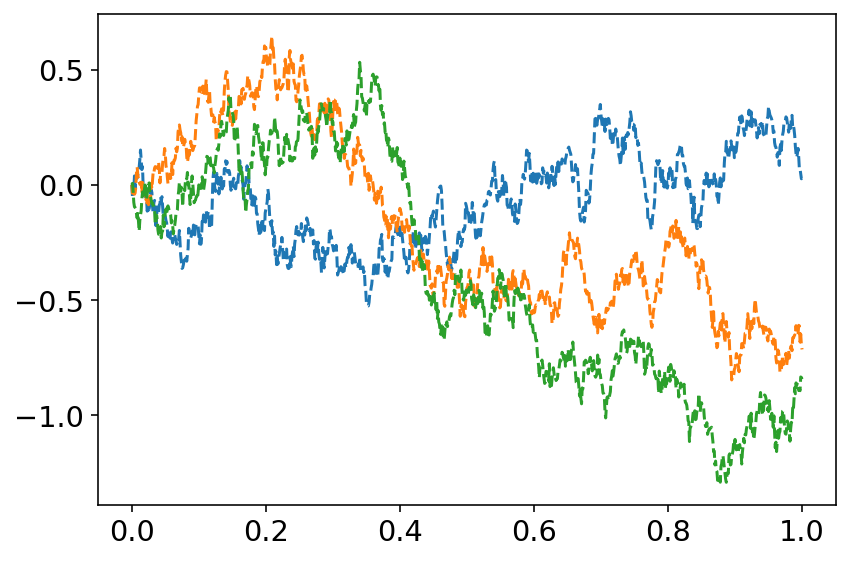

In [10]:
plt.figure()
plt.plot(time, sims, linestyle = '--')
resolution_value = 50
#plt.title('Five simulations of a Brownian motion')
plt.tight_layout()
plt.savefig('../figures/sample_path_Brownian_motion.pdf', format="pdf", dpi=resolution_value)
plt.show()

## Geometric Brownian motion
$$
\left(S_t\right)_{t\in[0,1]}
$$
where 
$$
S_t = S_0 \,e^{\left(\mu - \frac12 \sigma^2\right)\,t + \sigma\, W_t}
$$

In [11]:
GBM = utils.GeometricBrownianMotion(x0 = 100, mu = 0.01, sigma = 0.05, T = 1, Nt = 1_000)

In [12]:
sims = GBM.simulate(nsims = 3)
time = GBM.timesteps

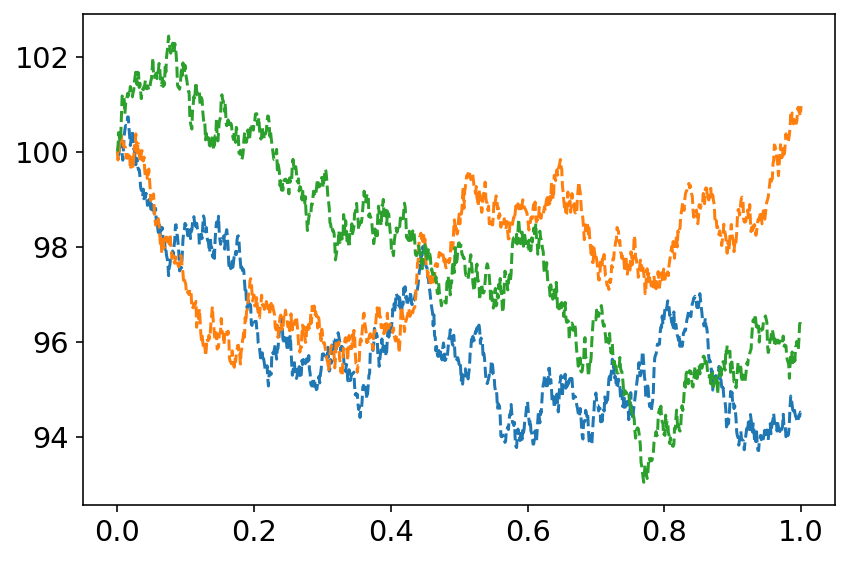

In [13]:
plt.figure()
plt.plot(time, sims, linestyle = '--')
resolution_value = 50
#plt.title('Five simulations of a Geometric Brownian motion')
plt.tight_layout()
plt.savefig('../figures/sample_path_Geometric_Brownian_motion.pdf', format="pdf", dpi=resolution_value)
plt.show()

In [14]:
def call_option_payoff(K, S):
    return np.maximum(S-K,0)

In [15]:
K = 100
S = np.linspace(start = 0,stop = 200, num = 1000)
payoff = call_option_payoff(K = K, S = S)

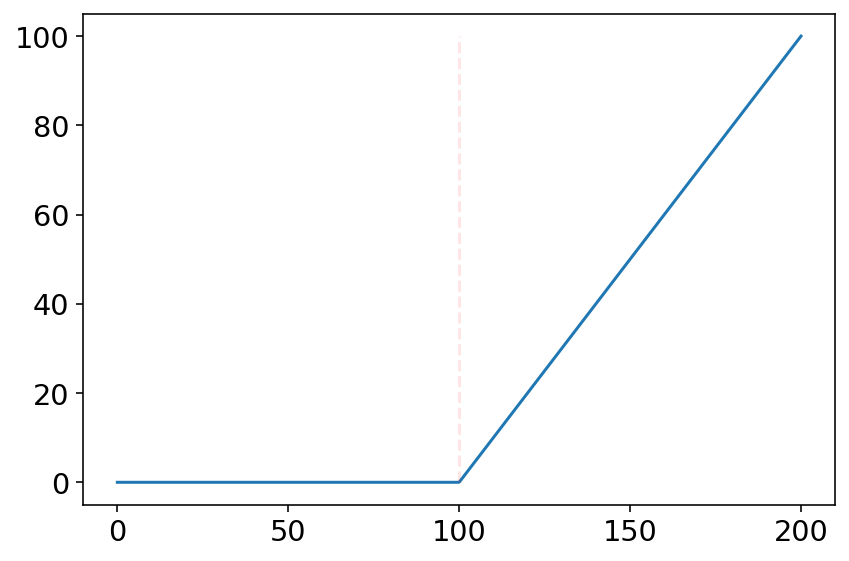

In [16]:
plt.figure()
plt.plot(S, payoff, linestyle = '-')
plt.vlines(x = K, ymin = 0, ymax = np.max(payoff), color = 'r', linestyles='--', alpha = 0.1)
resolution_value = 50
plt.tight_layout()
plt.savefig('../figures/hockey_stick.pdf', format="pdf", dpi=resolution_value)
plt.show()

## Euler simulation of BM
The impact of the step size

In [17]:
BM = utils.BrownianMotion(T = 1, Nt = 5)
BM_10 = utils.BrownianMotion(T = 1, Nt = 50)
BM_100 = utils.BrownianMotion(T = 1, Nt = 500)

In [18]:
sims = BM.simulate(nsims = 3)
time = BM.timesteps

sims_10 = BM_10.simulate(nsims = 3)
time_10 = BM_10.timesteps

sims_100 = BM_100.simulate(nsims = 3)
time_100 = BM_100.timesteps

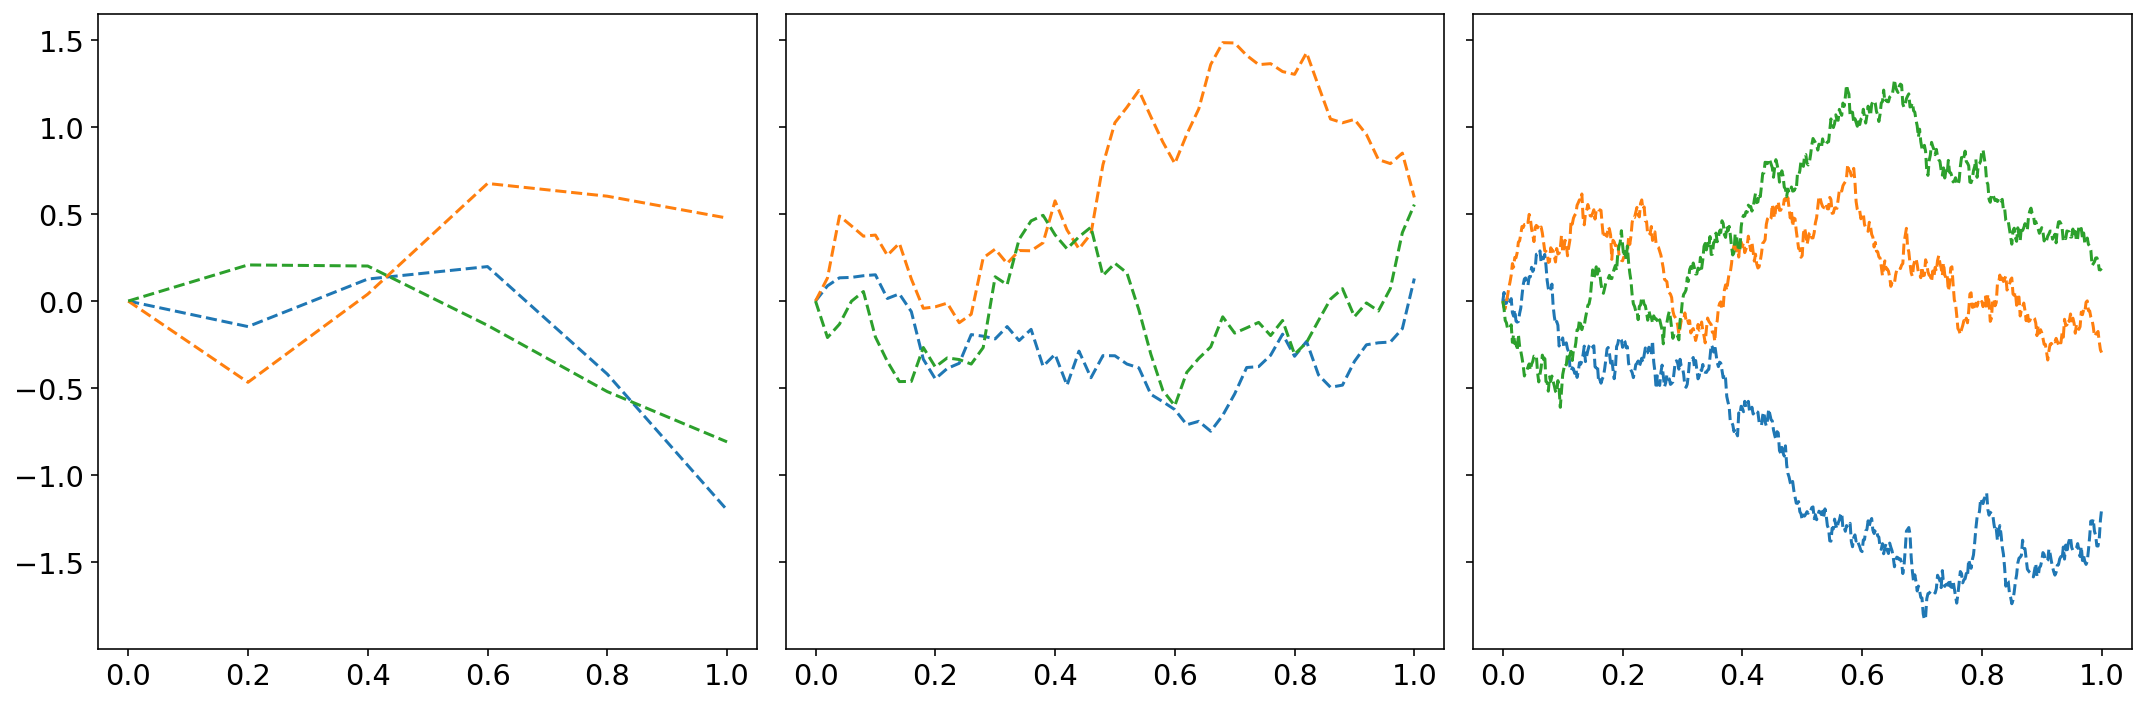

In [19]:
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(15, 5))
fig.tight_layout(pad=3)
ax[0].plot(time, sims, linestyle = '--')
ax[1].plot(time_10, sims_10, linestyle = '--')
ax[2].plot(time_100, sims_100, linestyle = '--')
resolution_value = 50
plt.tight_layout()
plt.savefig('../figures/impact_of_step_size.pdf', format="pdf", dpi=resolution_value)
plt.show()

## Density plots of a Normal random variable
Recall that 
$$
  f_Z(x) = \frac{1}{\sqrt{2\pi}} e^{-x^2/2} \,.
$$

In [20]:
from scipy import stats as stats

x = np.linspace(-4, 4, 1_000)
Z = stats.norm()

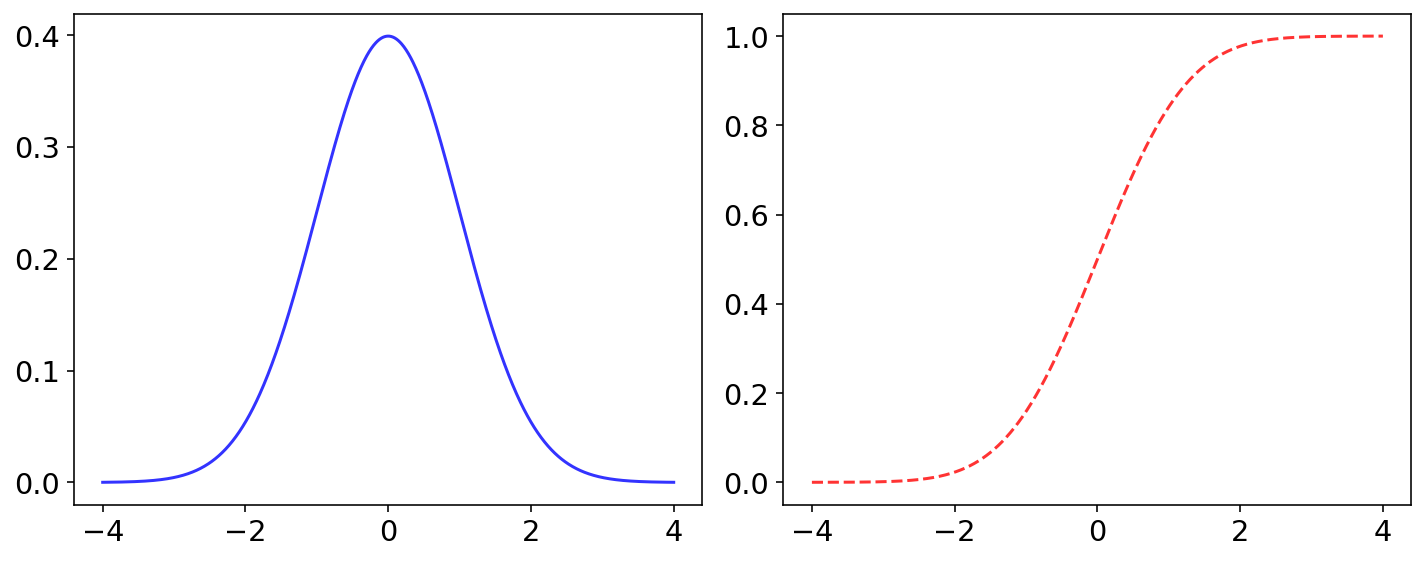

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
fig.tight_layout(pad=3)
ax[0].plot(x, Z.pdf(x), linestyle = '-', color = 'b', alpha = 0.8)
ax[1].plot(x, Z.cdf(x), linestyle = '--', color = 'r', alpha = 0.8)
resolution_value = 50
plt.tight_layout()
plt.savefig('../figures/normal_rv_pdf_cdf.pdf', format="pdf", dpi=resolution_value)
plt.show()

In [22]:
x = np.linspace(-1, 2, 1_000)
U = stats.uniform()
E = stats.expon()

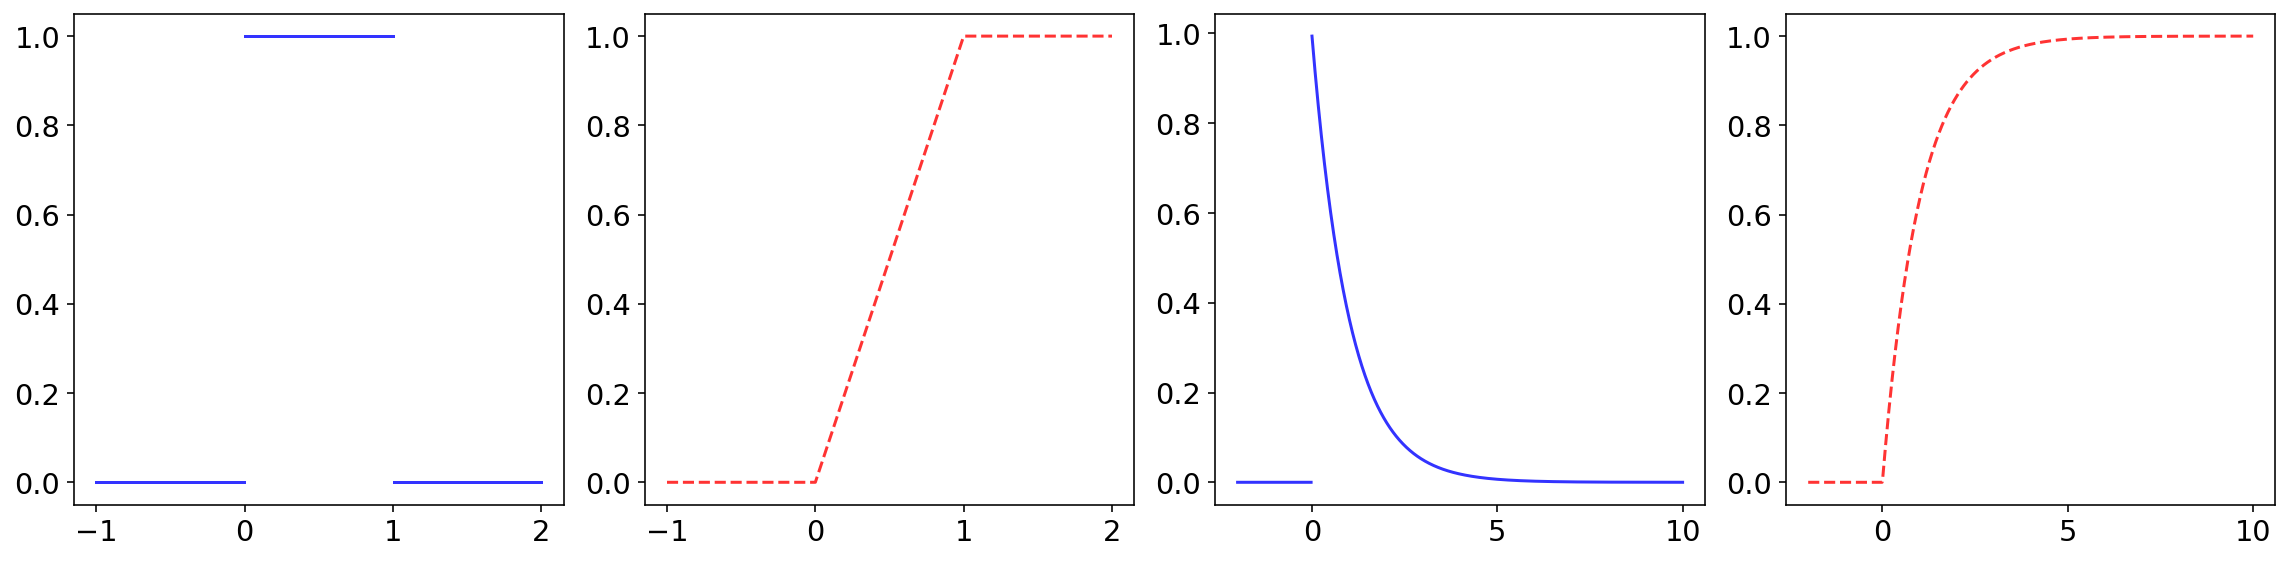

In [23]:
fig, ax = plt.subplots(1, 4, figsize=(16, 4))
fig.tight_layout(pad=3)

y = U.pdf(x)
idx = np.argwhere(np.abs(np.diff(y))>0.99)
y[idx] = np.nan

ax[0].plot(x, y, linestyle = '-', color = 'b', alpha = 0.8)
ax[1].plot(x, U.cdf(x), linestyle = '--', color = 'r', alpha = 0.8)
x = np.linspace(-2, 10, 1_000)

y = E.pdf(x)
idx = np.argwhere(np.abs(np.diff(y))>0.99)
y[idx] = np.nan

ax[2].plot(x, y, linestyle = '-', color = 'b', alpha = 0.8)
ax[3].plot(x, E.cdf(x), linestyle = '--', color = 'r', alpha = 0.8)
resolution_value = 50
plt.tight_layout()
plt.savefig('../figures/uniform_and_exp_rv_pdf_cdf.pdf', format="pdf", dpi=resolution_value)
plt.show()